# Metrics

In [199]:
import pandas as pd
import numpy as np
import sklearn.metrics as skm

data = pd.read_csv("classification.csv")

tp = len(data[(data['true'] == 1) & (data['pred'] ==1)])
fp = len(data[(data['true'] == 0) & (data['pred'] ==1)])
tn = len(data[(data['true'] == 0) & (data['pred'] ==0)])
fn = len(data[(data['true'] == 1) & (data['pred'] ==0)])

print tp, fp, tn, fn

acc = skm.accuracy_score(data['true'], data['pred'])
precision = skm.precision_score(data['true'], data['pred'])
recall = skm.recall_score(data['true'], data['pred'])
f_score = skm.f1_score(data['true'], data['pred'])

print acc, precision, recall, f_score

classif_num = len(class_scores.columns)
class_scores = pd.read_csv("scores.csv") 
auc_scores = [skm.roc_auc_score(class_scores['true'], class_scores.ix[:,i]) for i in xrange(1,classif_num )]

print auc_scores

presicion_l = list(xrange(classif_num - 1))
recall_l = list(xrange(classif_num - 1))

for i in xrange(1,classif_num):
    presicion_l[i-1], recall_l[i-1],_ = skm.precision_recall_curve(class_scores['true'], class_scores.ix[:,i])
    
maximas = []

for i in xrange(classif_num - 1):
    dataf = pd.DataFrame({'P': presicion_l[i], 'R': recall_l[i]})
    temp = dataf[dataf['R'] >= 0.7]
    maximas.append(max(temp['P']))
    
print np.argmax(maximas)

43 34 64 59
0.535 0.558441558442 0.421568627451 0.480446927374
[0.71918767507002801, 0.70868347338935567, 0.63515406162464982, 0.69192677070828335]
3


# Linear Regression

In [17]:
import numpy as np
import pandas as pd

data = pd.read_csv("salary-train.csv")
data_test = pd.read_csv("salary-test-mini.csv")

data['FullDescription'] = [text.lower() for text in data['FullDescription']]
data['FullDescription'] = data['FullDescription'].replace('[^a-z0-9]', ' ', regex = True)

data_test['FullDescription'] = [text.lower() for text in data_test['FullDescription']]
data_test['FullDescription'] = data_test['FullDescription'].replace('[^a-z0-9]', ' ', regex = True)

print data.head()

                                     FullDescription LocationNormalized  \
0  international sales manager london     k      ...             London   
1  an ideal opportunity for an individual that ha...             London   
2  online content and brand manager   luxury reta...  South East London   
3  a great local marketleader is seeking a perman...            Dereham   
4  registered nurse   rgn  nursing home for young...   Sutton Coldfield   

  ContractTime  SalaryNormalized  
0    permanent             33000  
1    permanent             50000  
2    permanent             40000  
3    permanent             22500  
4          NaN             20355  


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 5)
X_text = vectorizer.fit_transform(data['FullDescription'])
X_test = vectorizer.transform(data_test['FullDescription'])
print data.head()

                                     FullDescription LocationNormalized  \
0  international sales manager london     k      ...             London   
1  an ideal opportunity for an individual that ha...             London   
2  online content and brand manager   luxury reta...  South East London   
3  a great local marketleader is seeking a perman...            Dereham   
4  registered nurse   rgn  nursing home for young...   Sutton Coldfield   

  ContractTime  SalaryNormalized  
0    permanent             33000  
1    permanent             50000  
2    permanent             40000  
3    permanent             22500  
4          NaN             20355  


data['LocationNormalized'].fillna('nan', inplace=True)
data['ContractTime'].fillna('nan', inplace=True)

data_test['LocationNormalized'].fillna('nan', inplace=True)
data_test['ContractTime'].fillna('nan', inplace=True)

print data.head()

from sklearn.feature_extraction import DictVectorizer
enc = DictVectorizer()
X_train_categ = enc.fit_transform(data[['LocationNormalized', 'ContractTime']].to_dict('records'))
X_test_categ = enc.transform(data_test[['LocationNormalized', 'ContractTime']].to_dict('records'))

In [20]:
from scipy.sparse import vstack, hstack,coo_matrix

X_train_f = hstack([X_text, X_train_categ])
X_test_f = hstack([X_test, X_test_categ])

In [21]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha = 1, random_state = 241)
clf.fit(X_train_f, data['SalaryNormalized'])

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=241, solver='auto', tol=0.001)

In [22]:
print clf.predict(X_test_f)


[ 56555.61500155  37188.32442618]


# Method of main components

In [17]:

import pandas as pd

prices = pd.read_csv("close_prices.csv")
index = pd.read_csv("djia_index.csv")

prices = prices.drop('date',1)

print index.head()

         date          ^DJI
0  2013-09-23  15401.379883
1  2013-09-24  15334.589844
2  2013-09-25  15273.259766
3  2013-09-26  15328.299805
4  2013-09-27  15258.240234


In [38]:
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components = 10)
pca.fit(prices)

print pca.explained_variance_ratio_

tr_prices = pd.DataFrame(pca.transform(prices))

print np.corrcoef(tr_prices[0], index['^DJI'])

print prices.columns.values[np.argmax(pca.components_[0])]

[ 0.73897118  0.11007169  0.04995088  0.0287492   0.02215448  0.01931577
  0.00674853  0.00614091  0.00320594  0.00305611]
[[ 1.          0.90965222]
 [ 0.90965222  1.        ]]
V


# Random Forest

In [1]:
import pandas as pd

data = pd.read_csv("abalone.csv")
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

Y = data['Rings']
X = data.drop('Rings',1)



      Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  \
0       1   0.455     0.365   0.095       0.5140         0.2245   
1       1   0.350     0.265   0.090       0.2255         0.0995   
2      -1   0.530     0.420   0.135       0.6770         0.2565   
3       1   0.440     0.365   0.125       0.5160         0.2155   
4       0   0.330     0.255   0.080       0.2050         0.0895   
5       0   0.425     0.300   0.095       0.3515         0.1410   
6      -1   0.530     0.415   0.150       0.7775         0.2370   
7      -1   0.545     0.425   0.125       0.7680         0.2940   
8       1   0.475     0.370   0.125       0.5095         0.2165   
9      -1   0.550     0.440   0.150       0.8945         0.3145   
10     -1   0.525     0.380   0.140       0.6065         0.1940   
11      1   0.430     0.350   0.110       0.4060         0.1675   
12      1   0.490     0.380   0.135       0.5415         0.2175   
13     -1   0.535     0.405   0.145       0.6845         0.272

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
import numpy as np

grid = {"n_estimators": np.arange(1,50)}
ens = RandomForestRegressor(random_state = 1)
cv = KFold(Y.size, shuffle=True, n_folds=5, random_state = 1)
gs = GridSearchCV(ens, grid, scoring = 'r2', cv = cv)
gs.fit(X,Y)
for a in gs.grid_scores_:
    print(a.mean_validation_score)
    print(a.parameters)

0.102163125849
{'n_estimators': 1}
0.338412959313
{'n_estimators': 2}
0.403584837629
{'n_estimators': 3}
0.442722234326
{'n_estimators': 4}
0.464020401671
{'n_estimators': 5}
0.470580138647
{'n_estimators': 6}
0.47582658808
{'n_estimators': 7}
0.481738243326
{'n_estimators': 8}
0.488342750783
{'n_estimators': 9}
0.494458152768
{'n_estimators': 10}
0.493391074362
{'n_estimators': 11}
0.497961126662
{'n_estimators': 12}
0.50213210699
{'n_estimators': 13}
0.506424775497
{'n_estimators': 14}
0.508328085298
{'n_estimators': 15}
0.510509452008
{'n_estimators': 16}
0.513845502985
{'n_estimators': 17}
0.516324176384
{'n_estimators': 18}
0.519031046713
{'n_estimators': 19}
0.518670729546
{'n_estimators': 20}
0.51983247513
{'n_estimators': 21}
0.520155890139
{'n_estimators': 22}
0.521015079498
{'n_estimators': 23}
0.522401328334
{'n_estimators': 24}
0.522615326396
{'n_estimators': 25}
0.523804761492
{'n_estimators': 26}
0.524120059055
{'n_estimators': 27}
0.525050806268
{'n_estimators': 28}
0.52

# Gradient boosting

In [2]:
import pandas as pd

data = pd.read_csv("gbm-data.csv")

data_y = data['Activity']
data_X = data.drop('Activity', 1)

y = data_y.values
X = data_X.values

      Iter       Train Loss   Remaining Time 
         1           1.2613            2.08m
         2           1.1715            2.14m
         3           1.1009            2.20m
         4           1.0529            2.22m
         5           1.0130            2.18m
         6           0.9740            2.13m
         7           0.9475            2.06m
         8           0.9197            2.02m
         9           0.8979            1.98m
        10           0.8730            1.95m
        20           0.7207            2.01m
        30           0.6055            1.92m
        40           0.5244            1.84m
        50           0.4501            1.79m
        60           0.3908            1.72m
        70           0.3372            1.63m
        80           0.3009            1.59m
        90           0.2603            1.52m
       100           0.2327            1.44m
       200           0.0835           29.80s


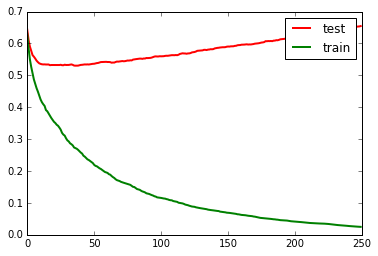

36 0.530439819735


In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import numpy as np

def print_plot(train_loss, test_loss ):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.show()

def sigm(y):
    return 1/(1 + np.exp(-1 * y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 241)


for el in [0.2]:
    clf = GradientBoostingClassifier(n_estimators = 250, learning_rate = el, verbose = True, random_state = 241)
    clf.fit(X_train, y_train)
    test_loss = np.empty(len(clf.estimators_))
    train_loss = np.empty(len(clf.estimators_))
    for i, pred in enumerate(clf.staged_decision_function(X_train)):
        train_loss[i] = log_loss(y_train, sigm(pred))
    for i, pred in enumerate(clf.staged_decision_function(X_test)):
        test_loss[i] = log_loss(y_test, sigm(pred))
    print_plot(train_loss, test_loss)
    m = np.argmin(test_loss)
    print m, test_loss[m]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

ens = RandomForestClassifier(n_estimators = 36, random_state = 241)
ens.fit(X_train, y_train)
print log_loss(y_test, ens.predict_proba(X_test))

0.54138128618
